In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = '../part01/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
f_app_test = os.path.join(dir_data, 'application_test.csv')
app_test = pd.read_csv(f_app_test)


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def first_look(data_frame):
    print("This data set is,     %s" % type(data_frame), '\n')
    print(f"The number of rows is {data_frame.shape[0]}")
    print(f"The number of cols is {data_frame.shape[1]}\n")
    print(f"These {data_frame.shape[1]} features' data type distribution is \n {data_frame.dtypes.value_counts()}")
    return

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


## Plan 
    12/18 只花一個的想法
- 對一個欄位很多的資料、沒有頭緒時，就該放緩步調，先由大到小
    - 大: 欄位有多少、都是那些型態、有沒有缺失值很多的能不能先刪除(時間資源下、刪 >10% Na)
    - 大: 離散度、集中度，每一欄的意義，找出三個來試(Heatmap)
    - 中: 這三個特徵的五值初步
    - 小: 這三個特徵與target 的關係，這三個特徵彼此的關係
    - 小: 者三個特徵的圖呈現

### 進行初步觀察
   - 我想看甚麼?  有多少列、有多少行。
   - 如果列很多，我要怎麼看列與整理列? 
       - 先看再說、如果看不懂先看類別、跟每一列的資料狀態(因為列很多，所以可能看每一列的unique# 這個動作已經在侷限與 object 列別了)
       - 如果還是很多很不清楚，就要先篩檢範疇
           - 缺失值比列<10%
           - heatmap corr. > .4 (one hot 要作了!)
   - 第二輪:剩下的特徵再重複上述動作看一次，如果數量大幅降低，是否進行離散集中初步觀察，如果還是沒有太多線索，就挑一群組來看看，
       - heatmap corr. 最大的幾個
       - correlation 相關的幾個
       - object 來作 encoding, labeling

### Baseline for submiting, 
    - correlation 掃一下 數值型 特徵, 取最大的五個
    - 人眼看一次，有感覺的找五個
    - 10 個取兩到三個觀察基本統計值然後視覺化

In [5]:
first_look(app_train)

This data set is,     <class 'pandas.core.frame.DataFrame'> 

The number of rows is 307511
The number of cols is 122

These 122 features' data type distribution is 
 float64    65
int64      41
object     16
dtype: int64


In [6]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 先看 correlation，刪除低 correlation，留下來的列入第一清單

In [7]:
SE_F = pd.DataFrame()
for i in app_train:
    Comp =pd.DataFrame()
    if (i != 'TARGET') and (app_train[i].dtype != 'object'):
        Comp['TARGET']=app_train['TARGET']
        Comp[i]=app_train[i]
        coe=abs(Comp.corr().iloc[0,1])
        if coe >0.06:
            SE_F[i]=Comp[i]
SE_F['TARGET']=app_train['TARGET']
           

In [8]:
SE_F.describe()

,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
count,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,307511.000000
mean,-16036.995067,2.031521,0.502130,5.143927e-01,0.510853,0.080729
std,4363.988632,0.502737,0.211062,1.910602e-01,0.194844,0.272419
min,-25229.000000,1.000000,0.014568,8.173617e-08,0.000527,0.000000
25%,-19682.000000,2.000000,0.334007,3.924574e-01,0.370650,0.000000
50%,-15750.000000,2.000000,0.505998,5.659614e-01,0.535276,0.000000
75%,-12413.000000,2.000000,0.675053,6.636171e-01,0.669057,0.000000
max,-7489.000000,3.000000,0.962693,8.549997e-01,0.896010,1.000000


### 人工觀察 Features 猜想 ATM，家人一起住等關係大吧，挑幾個列入清單2
### NAME 是 object 系列，有家庭、教育生活等資訊，下回再觀察


In [9]:
SE2_ls=[
 'AMT_INCOME_TOTAL','AMT_CREDIT',
 'AMT_ANNUITY',
'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR'
]

In [10]:
SE2_ls=SE2_ls+list(SE_F)
SE2_ls

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'DAYS_BIRTH',
 'REGION_RATING_CLIENT_W_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'TARGET']

In [11]:
SE2 = app_train[SE2_ls]

### 底下的觀察，可以發現有許多項目有很多缺失值

In [12]:
SE2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 15 columns):
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_REQ_CREDIT_BUREAU_HOUR     265992 non-null float64
AMT_REQ_CREDIT_BUREAU_DAY      265992 non-null float64
AMT_REQ_CREDIT_BUREAU_WEEK     265992 non-null float64
AMT_REQ_CREDIT_BUREAU_MON      265992 non-null float64
AMT_REQ_CREDIT_BUREAU_QRT      265992 non-null float64
AMT_REQ_CREDIT_BUREAU_YEAR     265992 non-null float64
DAYS_BIRTH                     307511 non-null int64
REGION_RATING_CLIENT_W_CITY    307511 non-null int64
EXT_SOURCE_1                   134133 non-null float64
EXT_SOURCE_2                   306851 non-null float64
EXT_SOURCE_3                   246546 non-null float64
TARGET                         307511 non-null int64
dtypes: float64(12), int64(3)
memory usage: 35.2 MB


### 下面的 Heatmap 發現我們人工挑的特徵與 TARGET 的相關性不高。
### 其實不算意外，我們的兩個步驟中的第一個步驟是有點相關的特徵挑選，
### 這些 ATM 項目當初都落選了!
### 後續
    除了先前說的 Name 系列
    與一些 object 特徵
    還有可以看一下 EXT_SOURCE 系列彼此的低相關性與 EXT_SOURCE_1 vs. DAYS_BIRTH
    分群的方法也是我該學習的

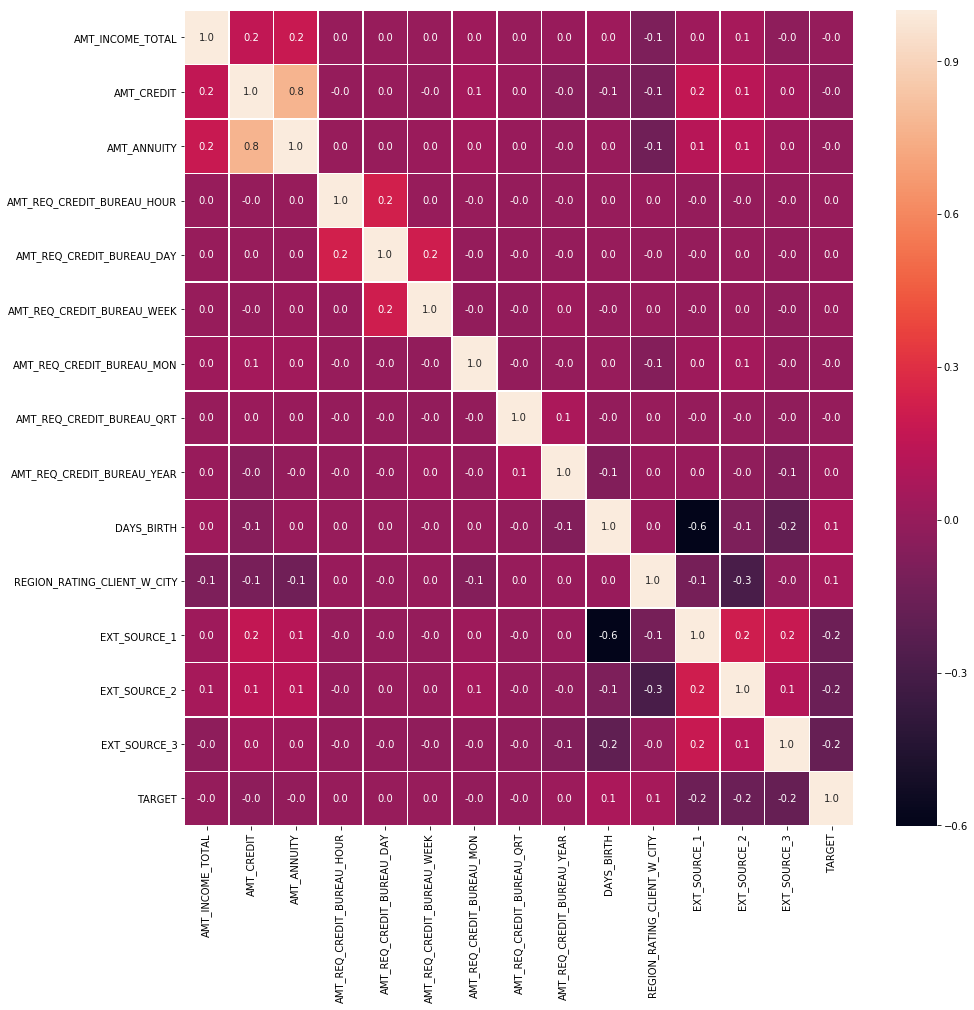

In [13]:
import seaborn as sns
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(SE2.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [14]:
# 刪掉 高缺失值比例的特徵
for i in SE2:
    NaR=(app_train.shape[0]-SE2[i].count())/app_train.shape[0]
    if NaR >0.15:
        SE2=SE2.drop(i, axis=1)
        print(i)
        
# 刪掉低相關性的特徵
SE_F = pd.DataFrame()
SE2=SE2.drop("TARGET",axis =1)
for i in SE2:
    Comp =pd.DataFrame()
    
    Comp['TARGET']=app_train['TARGET']
    Comp[i]=SE2[i]
    coe=abs(Comp.corr().iloc[0,1])
    if coe >0.06:
        SE_F[i]=Comp[i]
SE2=SE_F        

EXT_SOURCE_1
EXT_SOURCE_3


In [15]:
list(SE2)

['DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_2']

## Final at this round, we would like to observe 3 features,
    'DAYS_BIRTH',
    'REGION_RATING_CLIENT_W_CITY',
    'EXT_SOURCE_2'

In [16]:
FF=app_train[list(SE2)]

In [17]:
first_look(FF)

This data set is,     <class 'pandas.core.frame.DataFrame'> 

The number of rows is 307511
The number of cols is 3

These 3 features' data type distribution is 
 int64      2
float64    1
dtype: int64


In [18]:
FF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 3 columns):
DAYS_BIRTH                     307511 non-null int64
REGION_RATING_CLIENT_W_CITY    307511 non-null int64
EXT_SOURCE_2                   306851 non-null float64
dtypes: float64(1), int64(2)
memory usage: 7.0 MB


In [19]:
FF.DAYS_BIRTH.describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

##  EXT_SOURCE_2 未來需要補值
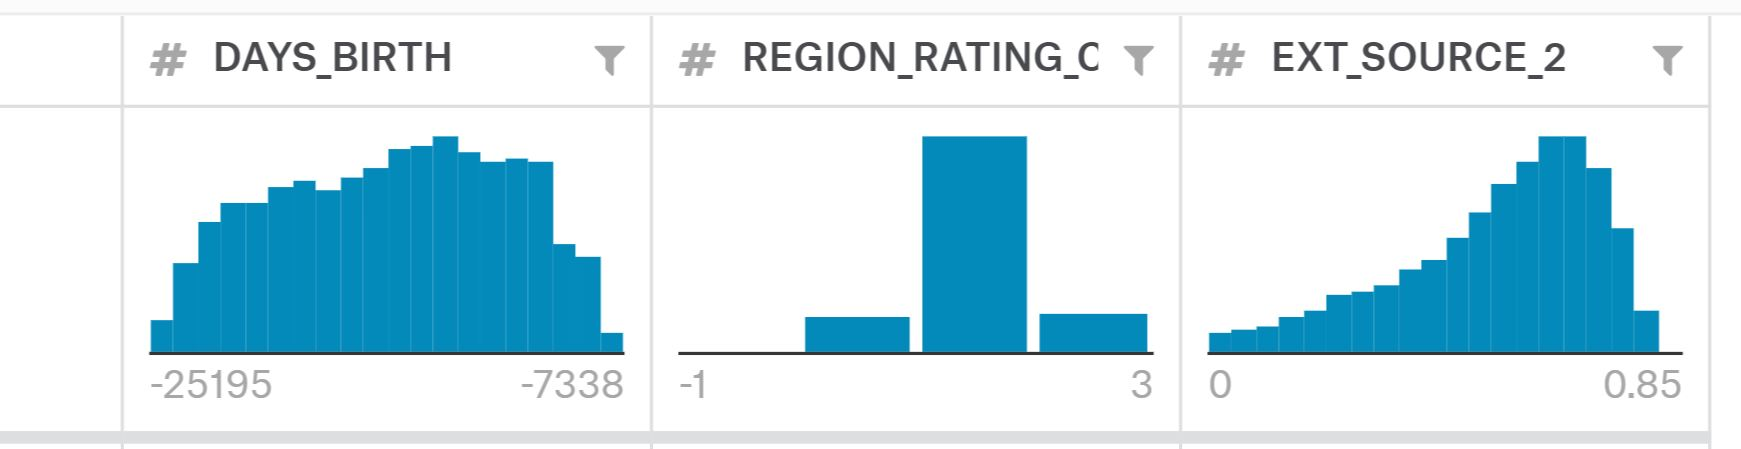


Text(0.5, 0, 'DAYS_BIRTH')

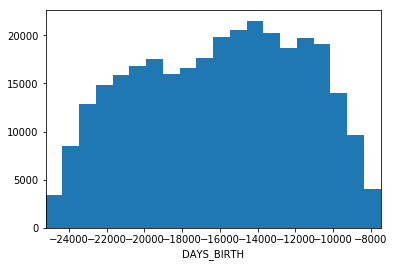

In [20]:
plt.hist(FF.DAYS_BIRTH, bins=20)
plt.xlim(FF.DAYS_BIRTH.min(), FF.DAYS_BIRTH.max())
plt.xlabel('DAYS_BIRTH')

Text(0.5, 0, 'REGION_RATING_CLIENT_W_CITY')

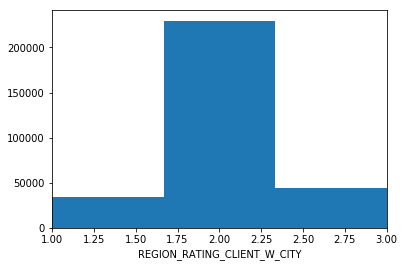

In [21]:
plt.hist(FF.REGION_RATING_CLIENT_W_CITY, bins=3)
plt.xlim(FF.REGION_RATING_CLIENT_W_CITY.min(), FF.REGION_RATING_CLIENT_W_CITY.max())
plt.xlabel('REGION_RATING_CLIENT_W_CITY')

C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'EXT_SOURCE_2')

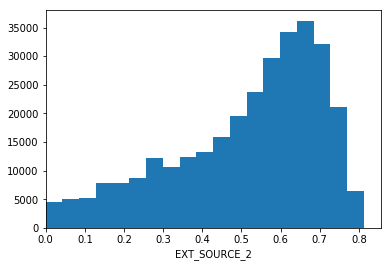

In [22]:
plt.hist(FF.EXT_SOURCE_2, bins=20)
plt.xlim(FF.EXT_SOURCE_2.min(), FF.EXT_SOURCE_2.max())
plt.xlabel('EXT_SOURCE_2')

Text(0.5, 0, 'EXT_SOURCE_2_log1')

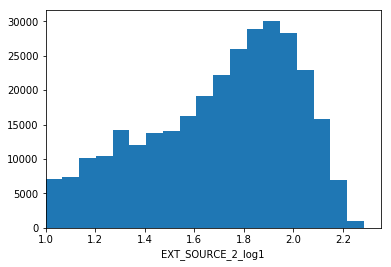

In [23]:
FFt = np.exp(FF.EXT_SOURCE_2)
plt.hist(FFt, bins=20)
plt.xlim(FFt.min(), FFt.max())
plt.xlabel('EXT_SOURCE_2_log1')


Text(0.5, 0, 'EXT_SOURCE_2_log2')

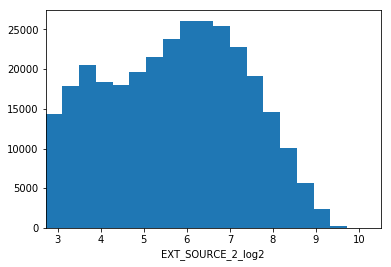

In [24]:
FFt = np.exp(FF.EXT_SOURCE_2)
FFt = np.exp(FFt)
plt.hist(FFt, bins=20)
plt.xlim(FFt.min(), FFt.max())
plt.xlabel('EXT_SOURCE_2_log2')